In [7]:
#import the libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import pandas as pd
import re
import html
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU, Dropout
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

In [8]:
# Parameters
vocab_size = 10000  # # Consider only the top 10,000 words in the dataset
maxlen = 500  # Cut off reviews after 500 words
embedding_dim = 32

#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [9]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocessing the Dataset

Pads the sequences to ensure uniform input length using pad_sequences

In [10]:
# Pad sequences to ensure that all input sequences have the same length
maxlen = 500  # Cut off reviews after 500 words
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Dataset splitting

In [11]:
# Split the training data into training and validation sets
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Building the RNN Model

In [12]:
# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compile the model

Model compilation: The model is compiled with the Adam optimizer, using binary cross-entropy as the loss function, and accuracy as the evaluation metric.

Early stopping callback: Monitors the validation loss (val_loss) and stops training if it doesn't improve for 3 consecutive epochs, restoring the best model weights.

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Train the model

Training process: The model is trained on the new training data (x_train_new, y_train_new) for up to 20 epochs, with a batch size of 32.

Validation: During each epoch, the model's performance is validated using the validation set (x_val, y_val).

Early stopping: Training will stop early if the validation loss doesn't improve for 3 consecutive epochs, thanks to the early_stopping callback. The training history is stored in the history variable.

In [14]:
# Train the model
history = model.fit(
    x_train_new, y_train_new,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 235ms/step - accuracy: 0.7052 - loss: 0.5401 - val_accuracy: 0.8552 - val_loss: 0.3429
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 233ms/step - accuracy: 0.8758 - loss: 0.3061 - val_accuracy: 0.8566 - val_loss: 0.3566
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 241ms/step - accuracy: 0.9268 - loss: 0.1941 - val_accuracy: 0.8680 - val_loss: 0.3270
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - accuracy: 0.8535 - loss: 0.3656 - val_accuracy: 0.8522 - val_loss: 0.4226
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 231ms/step - accuracy: 0.9345 - loss: 0.1744 - val_accuracy: 0.8666 - val_loss: 0.3750
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 229ms/step - accuracy: 0.9602 - loss: 0.1119 - val_accuracy: 0.8504 - val_loss: 0.4062


Evaluate the Model’s Performance

Test Accuracy: 86.28%, meaning the model correctly predicted 86.28% of the test samples.
Test Loss: 0.3354, which indicates the error in the model's predictions on the test set.
These results suggest that the model performs well on unseen data, with a good balance between accuracy and loss.

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.8621 - loss: 0.3403
Test Loss: 0.33542096614837646
Test Accuracy: 0.8628000020980835


Plot the training and validation loss and accuracy over epochs to visualize the
training process.

The graphs show model accuracy and loss over 5 training epochs. The training accuracy steadily increases while validation accuracy remains relatively flat, suggesting overfitting. This is supported by the loss graph, where training loss decreases but validation loss increases after epoch 2, indicating the model is memorizing training data rather than generalizing well to new data.

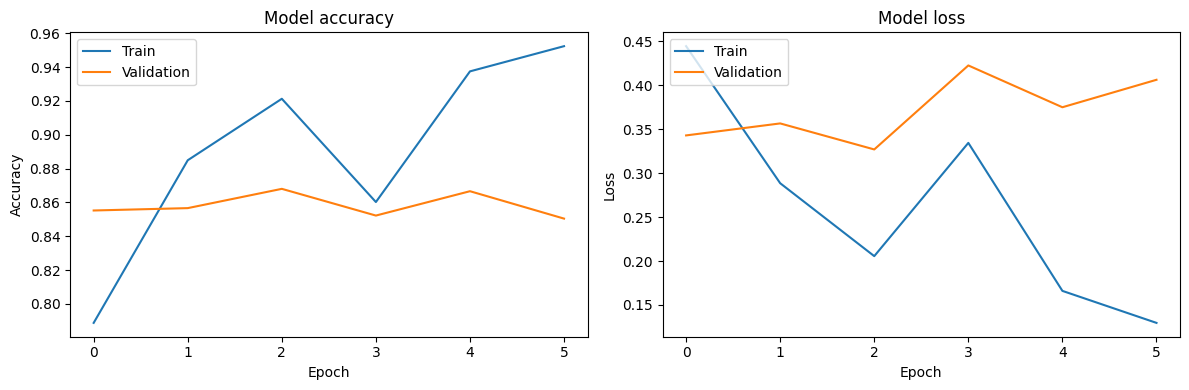

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Hyperparameter Tuning
Experiment with Different Hyperparameters
You can experiment with different numbers of LSTM units, layers, dropout rates, learning rates, etc., and observe how these changes affect performance.

Model Build (Hyperparameter Tuning 1)
Increase the number of LSTM units:

Modified Model: Uses 128 units in both the LSTM and Dense layers.


In [18]:

# Define the model with more units
model_more_units = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [19]:
# Compile the model
model_more_units.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])



Training Accuracy: Improved significantly from 67.75% to 91.97% over three epochs, indicating better performance on the training data.

Training Loss: Decreased from 0.5656 to 0.2119, showing reduced error on the training data.

Validation Accuracy: Increased from 82.48% to 85.10%, reflecting improved performance on the validation data.

Validation Loss: Showed a slight increase from 0.3962 to 0.3683, suggesting a minor deterioration in generalization.
Overall, the model with more units is improving in both training and validation metrics, but the validation loss increase suggests careful monitoring to avoid overfitting.

In [20]:
# Train the model with more units
history_more_units = model_more_units.fit(
    x_train_new, y_train_new,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 404s 643ms/step - accuracy: 0.6775 - loss: 0.5656 - val_accuracy: 0.8248 - val_loss: 0.3962
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 439s 638ms/step - accuracy: 0.8923 - loss: 0.2791 - val_accuracy: 0.8466 - val_loss: 0.3611
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 439s 634ms/step - accuracy: 0.9197 - loss: 0.2119 - val_accuracy: 0.8510 - val_loss: 0.3683


In [21]:
# Evaluate the model on the test set
test_loss_more_units, test_accuracy_more_units = model_more_units.evaluate(x_test, y_test)
print(f'Test Loss with More Units: {test_loss_more_units}')
print(f'Test Accuracy with More Units: {test_accuracy_more_units}')




782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 227ms/step - accuracy: 0.8251 - loss: 0.3997
Test Loss with More Units: 0.3971995711326599
Test Accuracy with More Units: 0.8267199993133545


These graphs show model performance with increased units over 2 epochs. The training accuracy increases more steadily than before, while validation accuracy also shows slight improvement. The loss graph indicates better generalization, with both training and validation loss decreasing, though validation loss plateaus. This suggests the model with more units is learning more effectively and generalizing better than the previous version, but there's still room for improvement in validation performance.

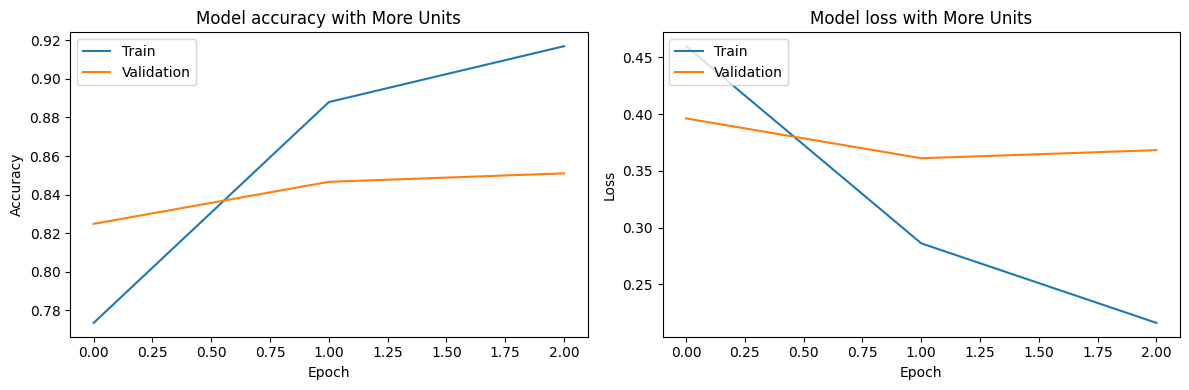

In [22]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_more_units.history['accuracy'])
plt.plot(history_more_units.history['val_accuracy'])
plt.title('Model accuracy with More Units')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_more_units.history['loss'])
plt.plot(history_more_units.history['val_loss'])
plt.title('Model loss with More Units')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Hyperparameter Tuning 2 :Adjust dropout rate

Modify the model by adding more dropout and adjusting dropout

The model adds multiple dropout layers with a rate of 0.5 to combat overfitting by randomly dropping 50% of the units during training.
Includes two LSTM layers to capture more complex temporal patterns in the data.
The use of dropout after each LSTM and Dense layer aims to improve generalization and reduce the risk of overfitting.




In [23]:
# Modify your model to include dropout
model_dropout = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128, return_sequences=True),
    Dropout(0.5),  # Dropout after LSTM
    LSTM(128),
    Dropout(0.5),  # Dropout after second LSTM layer
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])





In [24]:
# Compile the model

model_dropout.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


In [25]:

# Train the model with adding and adjusting the dropout

history_dropout = model_dropout.fit(
    x_train_new, y_train_new,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 965s 2s/step - accuracy: 0.6368 - loss: 0.6067 - val_accuracy: 0.8496 - val_loss: 0.3836
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 944s 2s/step - accuracy: 0.8562 - loss: 0.3638 - val_accuracy: 0.8642 - val_loss: 0.3311
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 995s 2s/step - accuracy: 0.9098 - loss: 0.2428 - val_accuracy: 0.8680 - val_loss: 0.3533


The training accuracy increases more steadily than before, while validation accuracy also shows slight improvement. The loss graph indicates better generalization, with both training and validation loss decreasing, though validation loss plateaus. This suggests the model with more units is learning more effectively and generalizing better than the previous version, but there's still room for improvement in validation performance.

In [26]:
# Evaluate the model on the test set
test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(x_test, y_test)
print(f'Test Loss with Dropout: {test_loss_dropout}')
print(f'Test Accuracy with Dropout: {test_accuracy_dropout}')

Evaluate the model on the test set

782/782 ━━━━━━━━━━━━━━━━━━━━ 363s 464ms/step - accuracy: 0.8429 - loss: 0.3871
Test Loss with Dropout: 0.3859774172306061
Test Accuracy with Dropout: 0.8446000218391418


Hyperparameter Tuning 3: Change Learning rate

Adam Optimizer: Initialized with a learning rate of 0.0001. This is a low learning rate compared to the default (0.001), which means the model's weights will be updated more gradually during training, potentially leading to more stable convergence.

In [29]:
# Define the model with different learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_different_lr = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_different_lr.compile(optimizer=optimizer,
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Train the model with different learning rate
history_different_lr = model_different_lr.fit(
    x_train_new, y_train_new,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 237ms/step - accuracy: 0.5340 - loss: 0.6909 - val_accuracy: 0.7572 - val_loss: 0.5469
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 235ms/step - accuracy: 0.8029 - loss: 0.4605 - val_accuracy: 0.8750 - val_loss: 0.3064
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 237ms/step - accuracy: 0.9031 - loss: 0.2540 - val_accuracy: 0.8850 - val_loss: 0.2766
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 235ms/step - accuracy: 0.9254 - loss: 0.2032 - val_accuracy: 0.8860 - val_loss: 0.2824
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 234ms/step - accuracy: 0.9457 - loss: 0.1627 - val_accuracy: 0.8798 - val_loss: 0.2976
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 232ms/step - accuracy: 0.9575 - loss: 0.1328 - val_accuracy: 0.8836 - val_loss: 0.3082


Model Evaluation (Hyperparameter Tuning 3: Change Learning rate)


These graphs show model performance with a different learning rate over 5 epochs. The training accuracy steadily increases, while validation accuracy improves quickly initially but plateaus after epoch 2. The loss graph shows both training and validation loss decreasing, with validation loss stabilizing around epoch 2. This suggests the new learning rate allows for faster initial learning and better generalization, but the model may be approaching its capacity to improve further on the validation set after epoch 2.

782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.8758 - loss: 0.2911
Test Loss with Different Learning Rate: 0.29164841771125793
Test Accuracy with Different Learning Rate: 0.8763999938964844


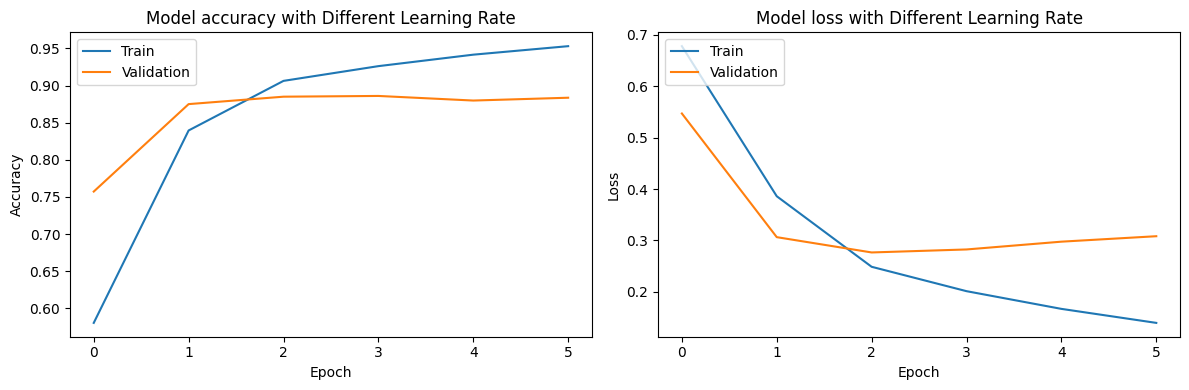

In [30]:
# Evaluate the model on the test set
test_loss_different_lr, test_accuracy_different_lr = model_different_lr.evaluate(x_test, y_test)
print(f'Test Loss with Different Learning Rate: {test_loss_different_lr}')
print(f'Test Accuracy with Different Learning Rate: {test_accuracy_different_lr}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_different_lr.history['accuracy'])
plt.plot(history_different_lr.history['val_accuracy'])
plt.title('Model accuracy with Different Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_different_lr.history['loss'])
plt.plot(history_different_lr.history['val_loss'])
plt.title('Model loss with Different Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

FeedForward Neural Network (FNN) Model

RNN: Better at capturing temporal dependencies in sequences.
FNN: Simpler, faster to train.

In [31]:
from tensorflow.keras.layers import Flatten

# Define the feedforward neural network model
model_fnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the FNN model
model_fnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [32]:
# Train the FNN model
history_fnn = model_fnn.fit(
    x_train_new, y_train_new,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6381 - loss: 0.5786 - val_accuracy: 0.8736 - val_loss: 0.2946
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9549 - loss: 0.1345 - val_accuracy: 0.8594 - val_loss: 0.3531
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9932 - loss: 0.0244 - val_accuracy: 0.8590 - val_loss: 0.5538


In [33]:
# Evaluate the FNN model on the test set
test_loss_fnn, test_accuracy_fnn = model_fnn.evaluate(x_test, y_test)
print(f'Test Loss (FNN): {test_loss_fnn}')
print(f'Test Accuracy (FNN): {test_accuracy_fnn}')



782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8653 - loss: 0.3068
Test Loss (FNN): 0.30402156710624695
Test Accuracy (FNN): 0.8684399724006653


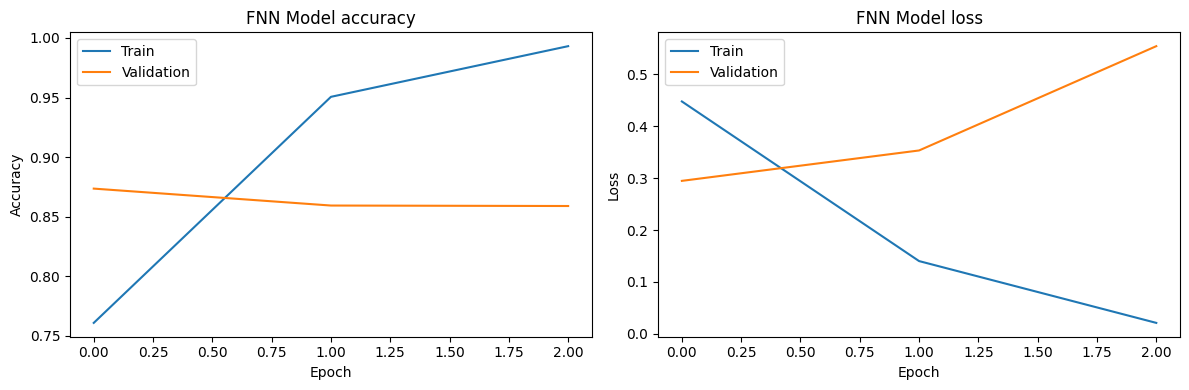

In [34]:
# Plot training & validation accuracy and loss values for FNN
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'])
plt.plot(history_fnn.history['val_accuracy'])
plt.title('FNN Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'])
plt.plot(history_fnn.history['val_loss'])
plt.title('FNN Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Conclusion

RNN:

Strengths: Better at handling sequential and time-series data, capturing dependencies over sequences.

Weaknesses: More complex and computationally expensive, risk of overfitting if not managed properly.

FNN:

Strengths: Simpler, faster to train, and easier to implement for non-sequential tasks.

Weaknesses: Limited in capturing sequential relationships and context, which can lead to reduced performance on tasks requiring understanding of order.

In general, RNNs performed better. However, for when computational resources are limited, FNNs can be a viable alternative, though they may not achieve the same performance on sequential data.






